# 3.6 Логистическая регрессия

В этом уроке мы познакомимся с применением логистической регрессии.

Второй шаг теоретический, если вы знакомы с методом, можете сразу переходить к третьему шагу про применение метода в R.

Если вы чувствуете, что вам стоит повторить принцип работы метода, то сначала лучше посмотрите второй шаг.

Скрипт урока:

https://stepic.org/media/attachments/lesson/11478/binomial_regression.R  

Данные урока:

Построение модели https://stepic.org/media/attachments/lesson/10226/train.csv

Предсказание результатов https://stepic.org/media/attachments/lesson/10226/test.csv


In [2]:
library(ggplot2)

my_df <- read.csv("https://stepic.org/media/attachments/lesson/10226/train.csv", sep=";")
str(my_df)


'data.frame':	150 obs. of  5 variables:
 $ gender: Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...
 $ read  : int  57 44 63 47 50 63 57 60 57 73 ...
 $ write : int  52 33 44 52 59 57 55 46 65 60 ...
 $ math  : int  41 54 47 57 42 54 52 51 51 71 ...
 $ hon   : Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 2 1 ...


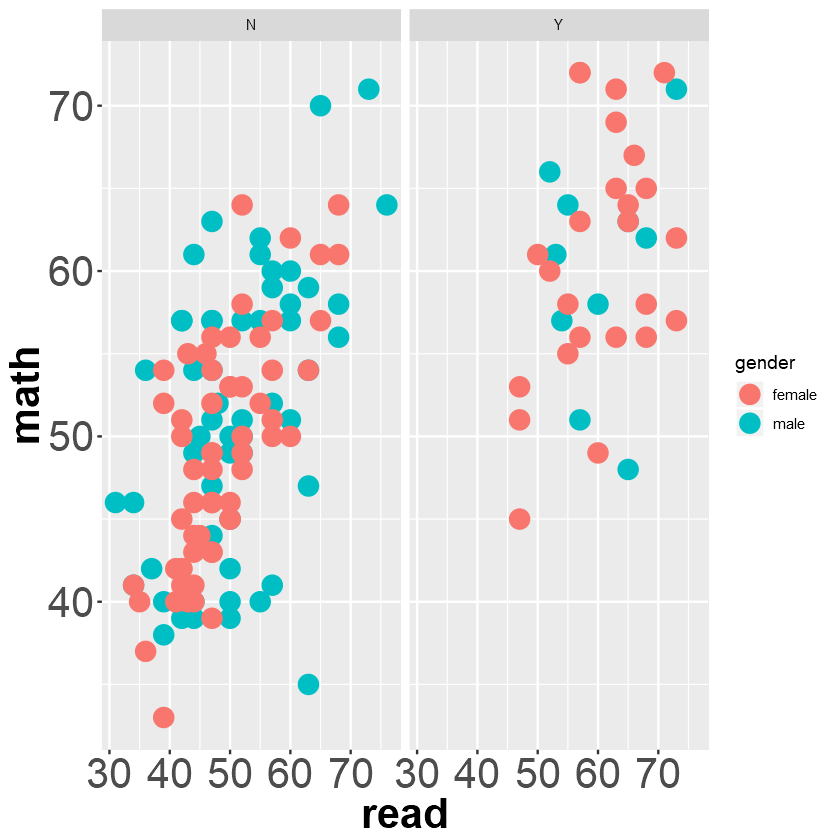

In [3]:
ggplot(my_df, aes(read, math, col = gender))+
  geom_point(size = 5)+
  facet_grid(.~hon)+
  theme(axis.text=element_text(size=25),
        axis.title=element_text(size=25,face="bold"))



In [4]:
fit  <- glm(hon ~ read + math + gender, my_df, family = "binomial")
summary(fit)


Call:
glm(formula = hon ~ read + math + gender, family = "binomial", 
    data = my_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8173  -0.5989  -0.3086  -0.1087   2.3626  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.12407    2.14263  -5.659 1.53e-08 ***
read          0.06677    0.03291   2.029  0.04247 *  
math          0.13907    0.04243   3.277  0.00105 ** 
gendermale   -1.18606    0.51326  -2.311  0.02084 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 162.98  on 149  degrees of freedom
Residual deviance: 109.75  on 146  degrees of freedom
AIC: 117.75

Number of Fisher Scoring iterations: 5


In [5]:
exp(fit$coefficients)

(Intercept)         read         math   gendermale 
5.427272e-06 1.069055e+00 1.149203e+00 3.054224e-01

In [6]:
head(predict(object = fit))

1         2         3         4         5         6 
-3.802171 -2.862355 -2.567112 -2.244825 -4.130526 -1.593634

In [7]:
head(predict(object = fit, type = "response"))

1          2          3          4          5          6 
0.02183486 0.05404619 0.07128525 0.09579675 0.01582013 0.16887324

In [8]:
my_df$prob  <- predict(object = fit, type = "response")


In [10]:
head(my_df)

gender,read,write,math,hon,prob
male,57,52,41,N,0.02183486
male,44,33,54,N,0.05404619
male,63,44,47,N,0.07128525
male,47,52,57,N,0.09579675
male,50,59,42,N,0.01582013
male,63,57,54,N,0.16887324


Используем данные mtcars. Сохраните в переменную логистическую регрессионную модель, где в качестве зависимой переменной выступает тип коробки передач (am), в качестве предикторов переменные disp, vs, mpg.

Значения коэффициентов регрессии сохраните в переменную log_coef.

In [33]:
glm(am~ disp + vs + mpg, mtcars, family = "binomial")$coefficients

(Intercept)        disp          vs         mpg 
 1.89136001 -0.02525354 -5.45384569  0.28418829

Дополните предложенный в задании код, чтобы построить следующий график по данным ToothGrowth.
Изобразите различия длины зубов морских свинок в различных условиях дозировки и типа потребляемого продукта.

По оси x - переменная supp.
По оси y - переменная len.
Цвет ящиков с усами (boxplot) - переменная dose.

Если все правильно, то должен получиться следующий график:

https://ucarecdn.com/18728214-1a5e-47c0-a239-8952442b99f9/

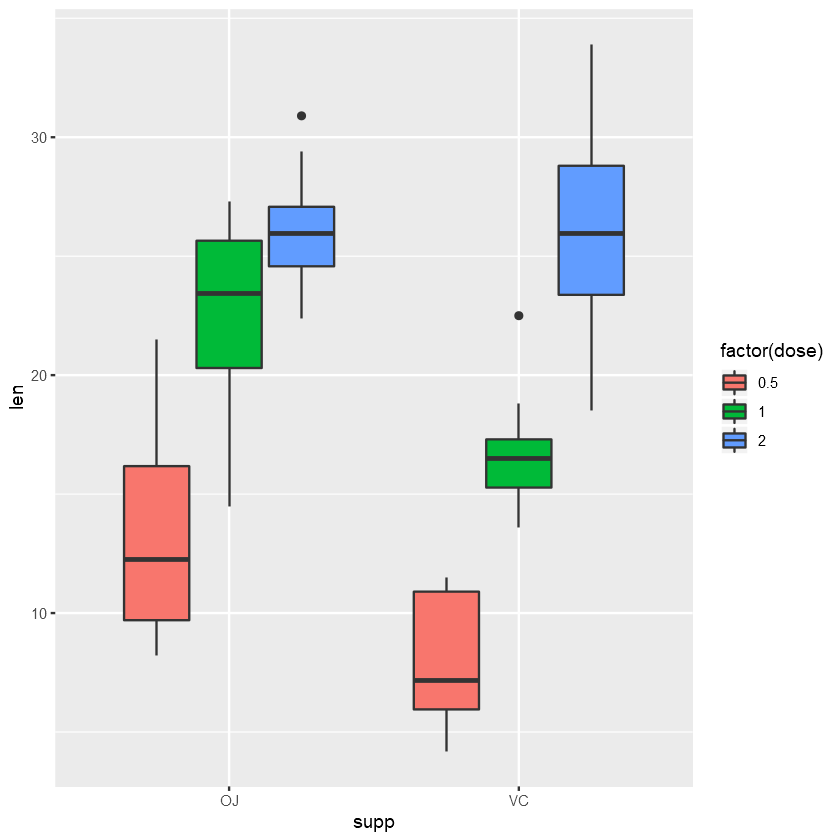

In [47]:
library("ggplot2")

ggplot(data = ToothGrowth, aes(x = supp,y = len,fill= factor(dose)))+
        geom_boxplot()


In [51]:
#install.packages('ROCR')

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



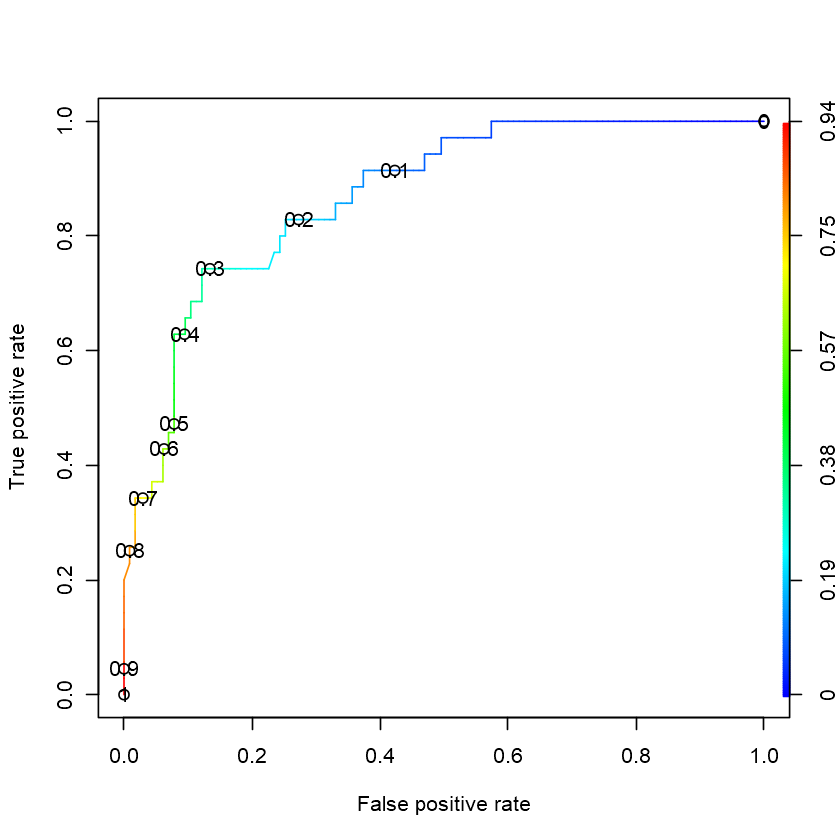

In [52]:
library(ROCR)

pred_fit <- prediction(my_df$prob, my_df$hon)
perf_fit <- performance(pred_fit,"tpr","fpr")
plot(perf_fit, colorize=T , print.cutoffs.at = seq(0,1,by=0.1))
auc  <- performance(pred_fit, measure = "auc")

In [53]:
str(auc)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "None"
  ..@ y.name      : chr "Area under the ROC curve"
  ..@ alpha.name  : chr "none"
  ..@ x.values    : list()
  ..@ y.values    :List of 1
  .. ..$ : num 0.87
  ..@ alpha.values: list()


In [54]:
perf3  <- performance(pred_fit, x.measure = "cutoff", measure = "spec")
perf4  <- performance(pred_fit, x.measure = "cutoff", measure = "sens")
perf5  <- performance(pred_fit, x.measure = "cutoff", measure = "acc")


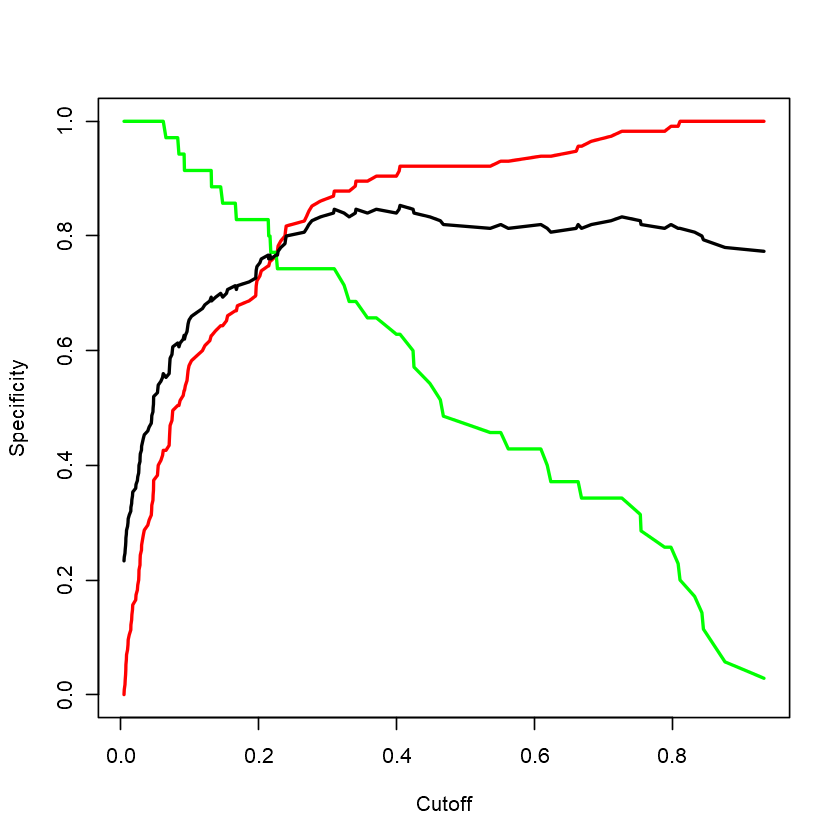

In [55]:
plot(perf3, col = "red", lwd =2)
plot(add=T, perf4 , col = "green", lwd =2)
plot(add=T, perf5, lwd =2)

In [56]:
legend(x = 0.6,y = 0.3, c("spec", "sens", "accur"), 
       lty = 1, col =c('red', 'green', 'black'), bty = 'n', cex = 1, lwd = 2)


ERROR: Error in strwidth(legend, units = "user", cex = cex, font = text.font): plot.new has not been called yet


In [57]:
abline(v= 0.225, lwd = 2)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


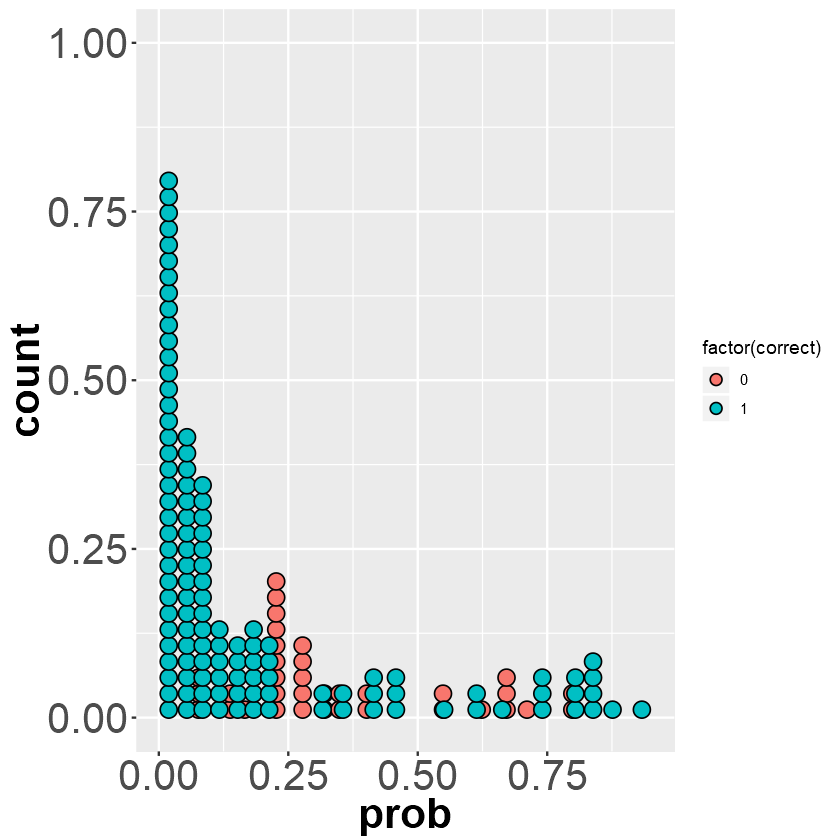

In [58]:
my_df$pred_resp  <- factor(ifelse(my_df$prob > 0.225, 1, 0), labels = c("N", "Y"))

my_df$correct  <- ifelse(my_df$pred_resp == my_df$hon, 1, 0)


ggplot(my_df, aes(prob, fill = factor(correct)))+
  geom_dotplot()+
  theme(axis.text=element_text(size=25),
        axis.title=element_text(size=25,face="bold"))

In [60]:
mean(my_df$correct)

test_df  <- read.csv("https://stepic.org/media/attachments/lesson/10226/test.csv", sep = ";")
test_df$hon  <- NA

test_df$hon  <- predict(fit, newdata = test_df, type = "response")
test_df

[1] 0.7666667

gender,read,write,math,hon
female,68,59,53,0.447007543
male,34,46,45,0.008311927
male,73,62,73,0.847666060
female,50,67,66,0.597046352
male,42,49,43,0.010711632
female,47,44,42,0.041297036
male,63,49,49,0.092040129
male,47,47,41,0.011318671
male,63,65,48,0.081059061
male,44,44,46,0.018434929


Используем модельные данные о соотношении среднего и высшего образования в американских школах.

Данные доступны по ссылке: https://stepic.org/media/attachments/lesson/11478/data.csv 

Про часть испытуемых известно, поступили они в университет или нет (переменная admit, 1 = поступили, 0 = не поступили), про остальных таких данных нет (NA). Описание данных (обратите на него внимание при проведении подсчётов):
```r
'data.frame':  400 obs. of  4 variables:
   admit: Factor w/ 2 levels "0","1": 1 2 NA NA 1 2 NA NA 2 1 ...
   gre  : int  380 660 800 640 520 760 560 400 540 700 ...
   gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
   rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...
```
По имеющимся данным в переменной admit постройте логистическую регрессионную модель, предсказывающую результат поступления по престижности учебного заведения среднего образования 

(переменная rank, 1 — наиболее престижное, 4 — наименее престижное) и результатов GPA (переменная gpa) с учётом их взаимодействия. Примените эту модель к той части данных, где результат поступления неизвестен.

Ответом в задаче будет предсказанное моделью число поступивших из тех, для кого результат поступления был неизвестен. Считаем человека поступившим, когда вероятность его поступления не меньше 0.4.

In [300]:
df <- read.csv('https://stepic.org/media/attachments/lesson/11478/data.csv')

In [301]:
df$admit <- factor(df$admit)

In [302]:
df$rank <- factor(df$rank)

In [303]:
str(df)

'data.frame':	400 obs. of  4 variables:
 $ admit: Factor w/ 2 levels "0","1": 1 2 NA NA 1 2 NA NA 2 1 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...


In [304]:
df_rm_na <- df[-which(is.na(df[1])),]           #без NA

In [305]:
fit  <- glm(admit ~ gre + gpa + rank, df_rm_na , family = "binomial")

In [306]:
x <- predict(object = fit,newdata = df , type = "response")

In [307]:
g <- ifelse(x[which(is.na(df[1]))] >= 0.4,1,0)
sum(g)

[1] 58